In [150]:
import anvil.server

anvil.server.connect("5A7BIZODCIYV7SAHC7VNVM2Y-R7FC7CVUDQBF2RS3")


In [151]:
import numpy as np # forlinear algebra
from numpy import asarray
import matplotlib.pyplot as plt #for plotting things
import pandas as pd
import os
from PIL import Image
print(os.listdir("/Users/mallikasansgiri/Downloads/chest_xray/chest_xray"))

# Keras Libraries
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

['.DS_Store', 'test', 'train', 'val']


# Setting up Train and Test folder

In [152]:
train_folder = "/Users/mallikasansgiri/Downloads/chest_xray/train"
val_folder = "/Users/mallikasansgiri/Downloads/chest_xray/val"
test_folder = "/Users/mallikasansgiri/Downloads/chest_xray/test"

In [153]:
train_normal = train_folder + "/NORMAL/"
train_pnuemonia = train_folder + "/PNEUMONIA/"

In [154]:
test_normal = test_folder + "/NORMAL/"
test_pnuemonia = test_folder + "/PNEUMONIA/"

There are 1341 in the normal training set
There are 3875 in the pneumonia training set
There are 234 in the normal testing set
There are 390 in the pneumonia testing set
Normal chest picture person331_bacteria_1529.jpeg


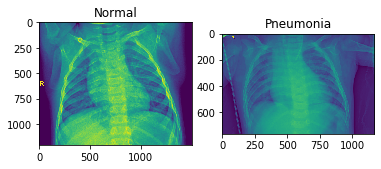

In [155]:
print("There are " + str(len(os.listdir(train_normal))) + " in the normal training set")
print("There are " + str(len(os.listdir(train_pnuemonia))) + " in the pneumonia training set")
print("There are " + str(len(os.listdir(test_normal))) + " in the normal testing set")
print("There are " + str(len(os.listdir(test_pnuemonia))) + " in the pneumonia testing set")

rand_num = np.random.randint(0, len(os.listdir(train_normal)))

norm_pic = os.listdir(train_normal)[rand_num]
pnuemonia_pic = os.listdir(train_pnuemonia)[rand_num]
print("Normal chest picture " + pnuemonia_pic  )

normal_img_load = Image.open(train_normal + norm_pic)
pneumonia_img_load = Image.open(train_pnuemonia + pnuemonia_pic)

f = plt.figure(figsize = (6,10))
a1 = f.add_subplot(1, 2, 1)
a1.set_title("Normal")
show_img = plt.imshow(normal_img_load)

a2 = f.add_subplot(1, 2, 2)
a2.set_title("Pneumonia")
showimg = plt.imshow(pneumonia_img_load)

In [156]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'], loss_weights=None,
    sample_weight_mode=None, weighted_metrics=None,)

In [157]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_set = train_datagen.flow_from_directory(train_folder, target_size = (64, 64),
                                             batch_size = 1, class_mode = 'binary')
validation_gen = test_datagen.flow_from_directory(val_folder, target_size = (64, 64),
                                             batch_size = 32, class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_folder, target_size = (64, 64),
                                             batch_size = 32, class_mode = 'binary' )

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [158]:
cnn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_23 (Dense)             (None, 1)               

In [159]:
model_fit = cnn.fit_generator(train_set,
                         steps_per_epoch = 164,
                         epochs = 20,
                              
                         validation_data = validation_gen)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 164 steps, validate for 1 steps
Epoch 1/20
164/164 [==============================] - 6s 35ms/step - loss: 0.6468 - accuracy: 0.6951 - val_loss: 2.0650 - val_accuracy: 0.5000
Epoch 2/20
164/164 [==============================] - 4s 22ms/step - loss: 0.6957 - accuracy: 0.7988 - val_loss: 0.8265 - val_accuracy: 0.5000
Epoch 3/20
164/164 [==============================] - 4s 25ms/step - loss: 0.6403 - accuracy: 0.7012 - val_loss: 0.6789 - val_accuracy: 0.5000
Epoch 4/20
164/164 [==============================] - 4s 23ms/step - loss: 0.5402 - accuracy: 0.7195 - val_loss: 0.5972 - val_accuracy: 0.6250
Epoch 5/20
164/164 [==============================] - 4s 25ms/step - loss: 0.5280 - accuracy: 0.7927 - val_loss: 0.4698 - val_accuracy: 0.8125
Epoch 6/20
164/164 [==============================] - 4s 23ms/step - loss: 0.4426 - accuracy: 0.8415 - val_loss: 0.5050 - val_accuracy: 0.7500
Epoch 7/20
164/164 [==============================

In [160]:
test_acc = model_fit.model.evaluate(test_set)

  ...
    to  
  ['...']
20/20 [==============================] - 10s 493ms/step - loss: 0.4299 - accuracy: 0.7853


In [161]:
print('The testing accuracy is :',test_acc[1]*100, '%')

The testing accuracy is : 78.52563858032227 %


In [162]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (64, 64, 3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image


def diag(val):
    if val > 0.5 :
        return 'Pneumonia'
        
    else :
        return "Normal"
        



In [163]:
norm_pic = os.listdir(train_normal)[rand_num]
pnuemonia_pic = os.listdir(train_pnuemonia)[rand_num]
name = []
diagnosis = []
for i in range(len(os.listdir(test_pnuemonia))):
    diagnosis.append(diag(model_fit.model.predict(load(test_pnuemonia + os.listdir(test_pnuemonia)[i]))))
    name.append(os.listdir(test_pnuemonia)[i])

Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-419:
Traceback (most recent call last):
  File "/Users/mallikasansgiri/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/Users/mallikasansgiri/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/Users/mallikasansgiri/anaconda3/lib/python3.7/site-packages/anvil/_threaded_server.py", line 362, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/mallikasansgiri/anaconda3/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/Users/mallikasansgiri/anaconda3/lib/python3.7/threading.py", line 865, in run
    self._target(*self._

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK


In [164]:
df = pd.DataFrame({'id' : name, 'diagnosis' : diagnosis})
df

,id,diagnosis
0,person147_bacteria_706.jpeg,Pneumonia
1,person100_bacteria_482.jpeg,Pneumonia
2,person78_bacteria_382.jpeg,Pneumonia
3,person124_bacteria_589.jpeg,Pneumonia
4,person1647_virus_2848.jpeg,Pneumonia
5,person1675_virus_2891.jpeg,Pneumonia
6,person89_bacteria_440.jpeg,Pneumonia
7,person35_virus_80.jpeg,Pneumonia
8,person122_bacteria_582.jpeg,Pneumonia
9,person119_bacteria_565.jpeg,Pneumonia


In [165]:
import anvil.media 

@anvil.server.callable 
def diagnosImage(file):
    with anvil.media.TempFile(file) as filename :
        img = load(filename)
    val = model_fit.model.predict(img) 
    print(val)
    return diag(val), val[0][0]

Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-443:
Traceback (most recent call last):
  File "/Users/mallikasansgiri/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/Users/mallikasansgiri/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/Users/mallikasansgiri/anaconda3/lib/python3.7/site-packages/anvil/_threaded_server.py", line 362, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/mallikasansgiri/anaconda3/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/Users/mallikasansgiri/anaconda3/lib/python3.7/threading.py", line 865, in run
    self._target(*self._

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
